In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('bankloan.csv')
df


,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [41]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP.Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


# Desbalance de los datos

## Al visualizar los datos que se tienen, estos demuestran un desbalance de mas de 4000 personas que no tienen un prestamo personal y solamente 480 si lo tienen

<Axes: xlabel='Personal.Loan'>

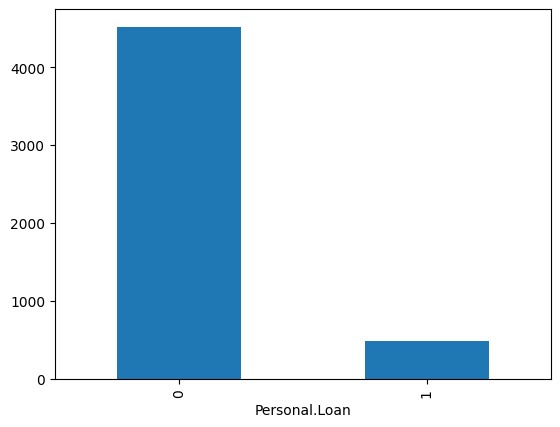

In [43]:
df['Personal.Loan'].value_counts().plot(kind='bar')

In [44]:
df.drop(['ID'],axis=1,inplace=True)
df.drop(['ZIP.Code'],axis=1,inplace=True)

df


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


# Balancing Data for further purposes

In [45]:
df_majority = df[df['Personal.Loan'] == 0]
df_minority = df[df['Personal.Loan'] == 1]

df_majority_downsampled = df_majority.sample(n = len(df_minority),random_state=101,replace=True)
df_balanced = pd.concat([df_majority_downsampled, df_minority])
df_balanced = df_balanced.sample(frac=1,random_state=101).reset_index(drop=True)
df = df_balanced
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,51,27,22,4,0.5,2,0,0,0,0,1,1
1,61,35,152,3,3.3,3,0,1,0,0,1,0
2,49,25,109,2,6.8,1,0,0,0,0,0,0
3,47,22,81,1,2.9,1,0,0,0,0,0,1
4,57,33,43,1,1.8,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
955,41,15,185,1,3.6,2,0,1,0,0,0,0
956,32,8,169,1,6.5,3,272,1,1,1,1,0
957,58,33,25,4,0.9,2,90,0,0,0,1,1
958,58,28,122,1,3.0,3,115,1,0,0,1,0


<Axes: xlabel='Personal.Loan'>

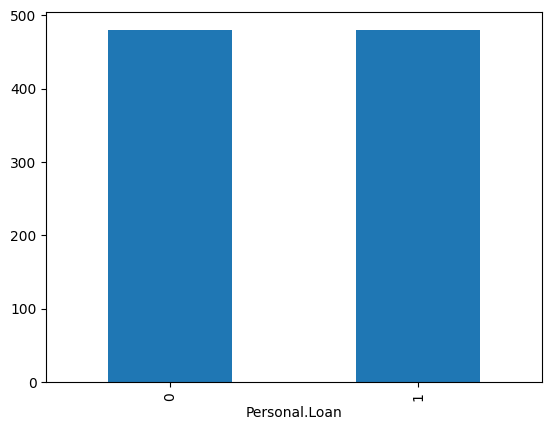

In [46]:
df['Personal.Loan'].value_counts().plot(kind='bar')

<Axes: xlabel='Education', ylabel='count'>

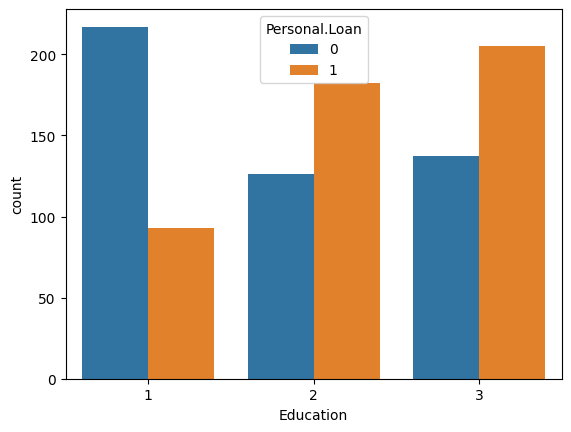

In [47]:
sns.countplot(df,x="Education",hue='Personal.Loan')

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import numpy as np

In [56]:
X = df.drop('Personal.Loan',axis=1)
y =df['Personal.Loan']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.60,random_state=101)


In [58]:
numerical_features = X.select_dtypes(include=['int64','float64'])
categorical_features = X.select_dtypes(exclude=['int64','float64'])

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first') #drops the column 

In [62]:
from xgboost import XGBClassifier 

preprocesador = ColumnTransformer(
    transformers = [
        ("num",numerical_transformer,numerical_features.columns),
        ('cat',categorical_transformer,categorical_features.columns)
    ]
)

model = Pipeline(
    steps =[
        ('preprocessor',preprocesador),
        ('rf',XGBClassifier(n_estimators =200,learning_rate = 0.01))
    ]
)

model.fit(X_train,y_train)
y_pred = model.predict(X_test)




In [63]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       195
           1       0.98      0.96      0.97       189

    accuracy                           0.97       384
   macro avg       0.97      0.97      0.97       384
weighted avg       0.97      0.97      0.97       384



<Axes: >

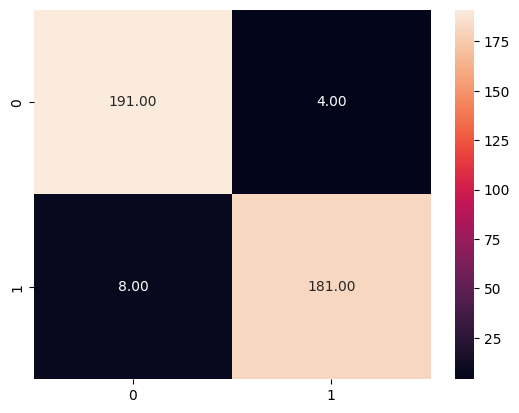

In [64]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.2f')